# 🔢 MNIST Handwritten Digit Recognition

📌Introduction:
The MNIST dataset is one of the most popular benchmark datasets in machine learning and deep learning.
It consists of 70,000 grayscale images of handwritten digits (0–9), where each image is 28x28 pixels.
Training set: 60,000 images | Test set: 10,000 images | Classes: 10 (digits 0 to 9).

🎯 Objective:
Build and train a Convolutional Neural Network (CNN) to classify handwritten digits from MNIST.
Understand the dataset, preprocess it, train the model, and evaluate its performance.
Visualize results and provide insights for further improvements.

In [57]:
#  Imoprt Libraries

# Data handling and numerical computations
import numpy as np

# Load MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Deep learning framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

# ===============================
# Ignore Warnings
# ===============================
import warnings
warnings.filterwarnings('ignore')

# 1.Load Dataset

In [58]:
# LOAD THE MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0
# Reshape data to fit the model (28x28 images with 1 channel)   

In [59]:

# Display dataset shapes
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


# 2.Exploratory Data Analysis(EDA)

Before training the model, it is important to explore the dataset to understand its characteristics.

✅ Key Explorations:
1. Dataset shape – Verify training and testing data dimensions.
2. Pixel intensity distribution – Check how image pixel values are spread (0–255).
3. Sample images – Visualize a few handwritten digits with labels.
4. Class distribution – Ensure that all digit classes (0–9) are balanced.
5. Unique labels – Confirm that dataset contains digits from 0 to 9.

In [60]:
# DATASET SHAPE
print("Training images Shape:", x_train.shape)
print("Training labels Shape:", y_train.shape)
print("Testing images Shape:", x_test.shape)
print("Testing labels Shape:", y_test.shape)


Training images Shape: (60000, 28, 28)
Training labels Shape: (60000,)
Testing images Shape: (10000, 28, 28)
Testing labels Shape: (10000,)


In [61]:
# UNIQUE LABELS
unique_labels = np.unique(y_train)
print("Unique labels in the dataset:", unique_labels)
print("Number of classes:", len(unique_labels))

Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


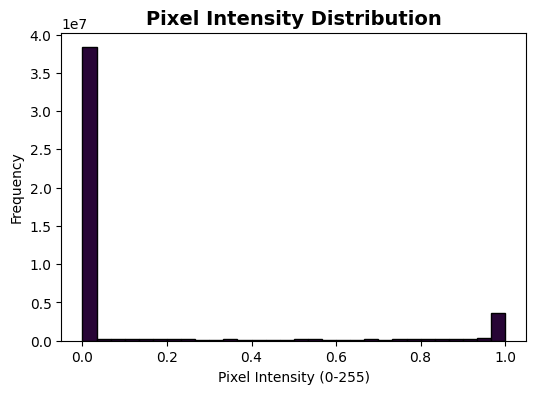

In [62]:
# Unique Intensity Distribution
plt.figure(figsize=(6,4))
plt.hist(x_train.reshape(-1), bins=30, color="#280536", edgecolor="black")
plt.title("Pixel Intensity Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

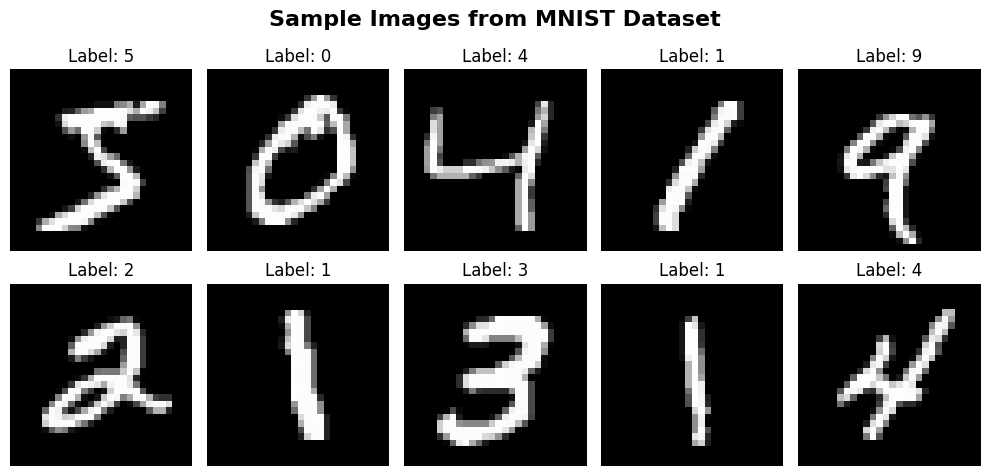

In [63]:
# Sample Images from the Dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()      
plt.show()


In [64]:
# DATASET SHAPE AND UNIQUE LABELS
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)
unique_labels = np.unique(y_train)
print("Unique labels in the dataset:", unique_labels)
print("Number of classes:", len(unique_labels))


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)
Unique labels in the dataset: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


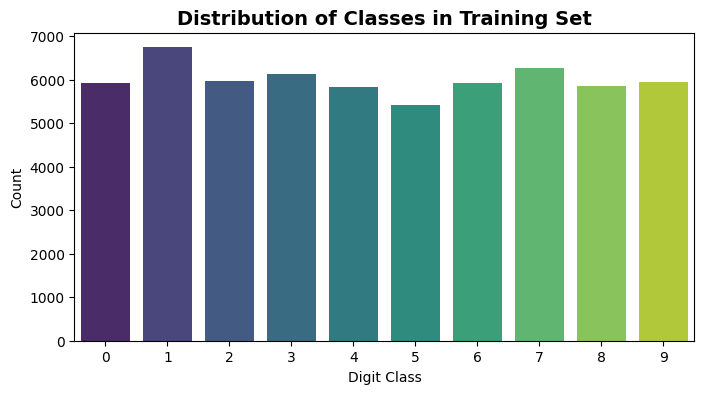

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribution of Classes in Training Set", fontsize=14, fontweight='bold')
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.show()

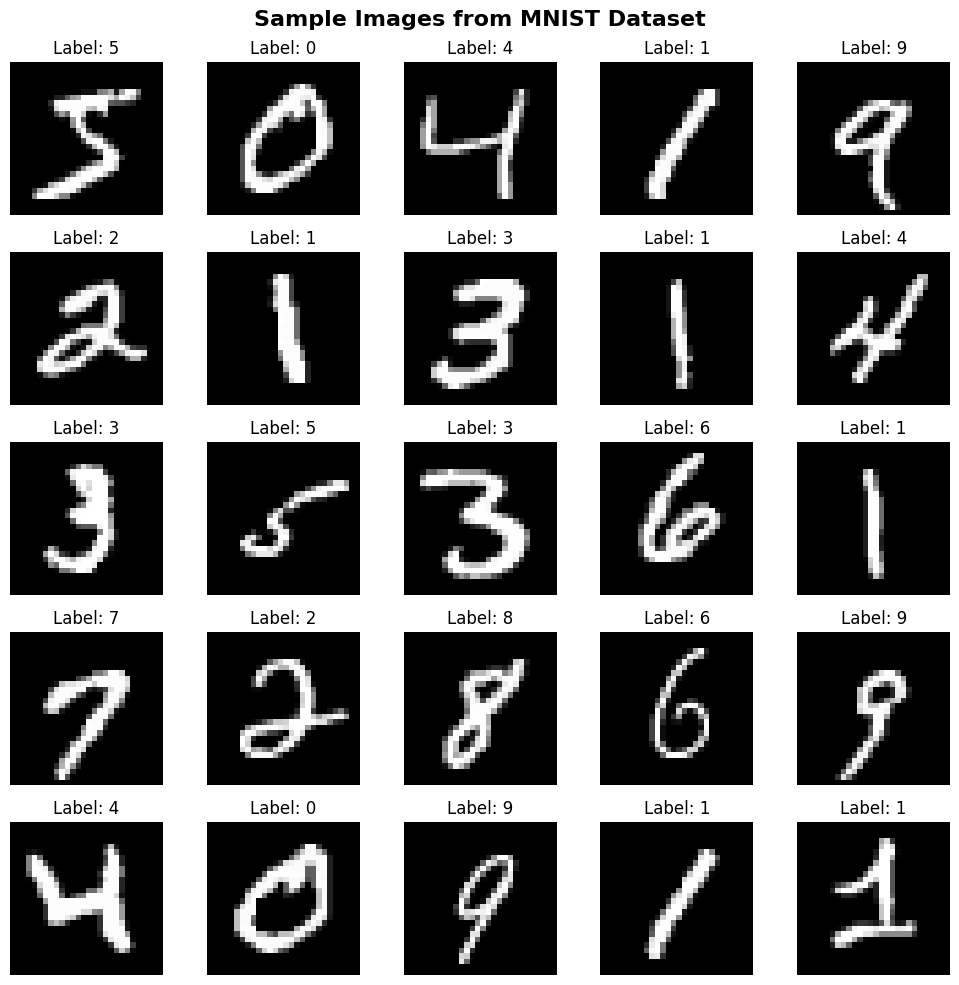

In [66]:
# Visualize some sample images from the dataset
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off') 
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 3.DATA PREPROCESSING


In [67]:
# NORMALIZE PIXEL VALUES
# Convert pixel values from integers (0-255) to floats (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("After normalization:")
print("Training data min:", x_train.min(), "max:", x_train.max())
print("Testing data min:", x_test.min(), "max:", x_test.max())

After normalization:
Training data min: 0.0 max: 0.003921569
Testing data min: 0.0 max: 1.0


In [68]:
# RESHAPE IMAGES
# Reshape training and testing images
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training data shape after reshape:", x_train.shape)
print("Testing data shape after reshape:", x_test.shape)

Training data shape after reshape: (60000, 28, 28, 1)
Testing data shape after reshape: (10000, 28, 28, 1)


🧠 Observations from Data Exploration:

- The MNIST dataset was successfully loaded from Keras without any manual download.
- The training set contains 60,000 images and the testing set has 10,000 images.
- Each image is of size 28×28 pixels and represents a handwritten digit from 0 to 9.
- All 10 digit classes (0–9) are present and well balanced in the dataset, as seen in the class distribution plot.
- After normalization, the pixel values now range between 0.0 and 1.0, which helps the CNN train more efficiently.
- The data was reshaped from (28, 28) to (28, 28, 1) so it can be properly used by convolutional layers in the model.

✅ In short, the dataset is clean, balanced, and properly preprocessed, ready to be used for CNN model training.

# 4.MODEL BUILDING

We will build a Convolutional Neural Network (CNN) to classify handwritten digits (0–9).

📐 Architecture:
1. Conv2D Layer + ReLU Activation → extract image features
2. MaxPooling2D → downsample feature maps
3. Dropout → prevent overfitting
4. Flatten → convert 2D features into 1D
5. Dense Layers → fully connected layers for classification
6. Output Layer (Dense + Softmax) → probability distribution over 10 classes

In [69]:
# Define the CNN architecture
model = Sequential([
    # First Conv + Pool block
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Second Conv + Pool block
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Flatten + Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output Layer (10 classes for digits 0–9)
    Dense(10, activation='softmax')
])

In [70]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

# 5.COMPILE MODEL

Before training, we need to compile the CNN model.

- Optimizer: Adam → adaptive learning rate optimizer, widely used for CNNs.
- Loss Function: SparseCategoricalCrossentropy → suitable since our labels are integers (0–9).
- Evaluation Metric: Accuracy → to monitor classification performance.

In [71]:
# Compile the CNN model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

# 6.TRAIN MODEL 

Now we will train our CNN model on the MNIST training data.

- We will use the fit() function of Keras.
- A validation split (10%) will be used to monitor performance on unseen data during training.
- Training history (loss & accuracy) will be saved for visualization in the next step.

Parameters used:
- Epochs: 10 (can be tuned)
- Batch Size: 128 (standard choice for efficiency)

In [72]:
# Train the model with validation split
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Check what metrics are stored in history
print("History keys:", history.history.keys())

Epoch 1/10
422/422 [==============================] - 25s 54ms/step - loss: 1.3727 - accuracy: 0.5314 - val_loss: 0.4271 - val_accuracy: 0.8860
Epoch 2/10
422/422 [==============================] - 23s 55ms/step - loss: 0.5768 - accuracy: 0.8185 - val_loss: 0.2369 - val_accuracy: 0.9305
Epoch 3/10
422/422 [==============================] - 25s 58ms/step - loss: 0.4160 - accuracy: 0.8713 - val_loss: 0.1550 - val_accuracy: 0.9575
Epoch 4/10
422/422 [==============================] - 25s 59ms/step - loss: 0.3315 - accuracy: 0.8986 - val_loss: 0.1250 - val_accuracy: 0.9663
Epoch 5/10
422/422 [==============================] - 27s 64ms/step - loss: 0.2836 - accuracy: 0.9142 - val_loss: 0.1066 - val_accuracy: 0.9715
Epoch 6/10
422/422 [==============================] - 27s 65ms/step - loss: 0.2515 - accuracy: 0.9240 - val_loss: 0.0974 - val_accuracy: 0.9713
Epoch 7/10
422/422 [==============================] - 27s 63ms/step - loss: 0.2309 - accuracy: 0.9304 - val_loss: 0.0874 - val_accuracy:

# 7.EVALUATE THE MODEL

After training, we evaluate the model on the test set to check its generalization performance.

Tasks:
1. Calculate Test Accuracy using model.evaluate().
2. Generate Predictions on the test data.
3. Confusion Matrix to visualize classification errors.
4. Classification Report for precision, recall, and F1-score of each digit class (0–9).

In [73]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Test Accuracy: 0.9391
✅ Test Loss: 24.7611


In [74]:
# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  

313/313 [==============================] - 2s 7ms/step


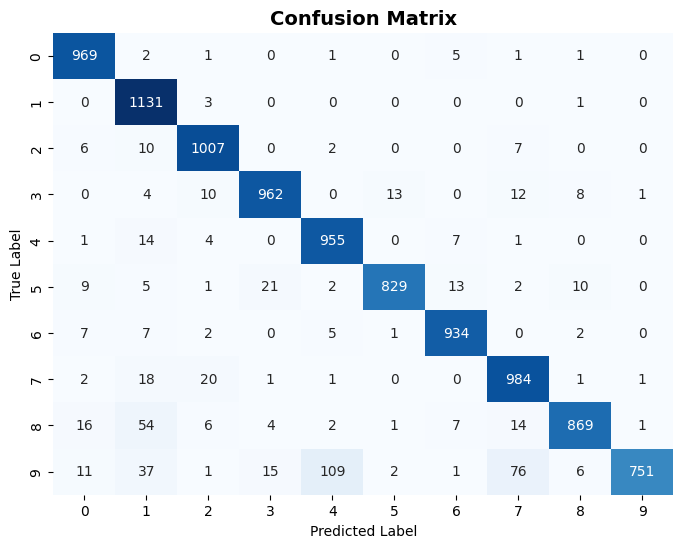

In [75]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")   
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [76]:
# Generate classification report
report = classification_report(y_test, y_pred, digits=4)
print("📊 Classification Report:\n")
print(report)

📊 Classification Report:

              precision    recall  f1-score   support

           0     0.9491    0.9888    0.9685       980
           1     0.8822    0.9965    0.9359      1135
           2     0.9545    0.9758    0.9650      1032
           3     0.9591    0.9525    0.9558      1010
           4     0.8867    0.9725    0.9276       982
           5     0.9799    0.9294    0.9540       892
           6     0.9659    0.9749    0.9704       958
           7     0.8970    0.9572    0.9261      1028
           8     0.9677    0.8922    0.9284       974
           9     0.9960    0.7443    0.8520      1009

    accuracy                         0.9391     10000
   macro avg     0.9438    0.9384    0.9384     10000
weighted avg     0.9425    0.9391    0.9380     10000



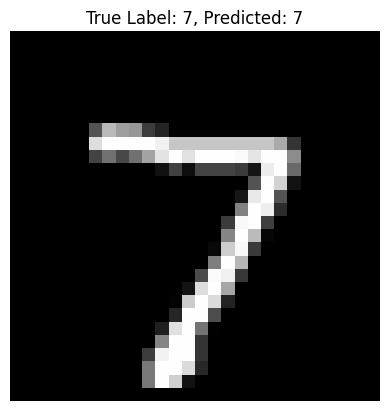

In [77]:
image_index = 0
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted: {y_pred[image_index]}", fontsize=12)
plt.axis('off')
plt.show()

In [78]:
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(f"Predicted Digit: {pred.argmax()}")

1/1 [==============================] - 0s 37ms/step
Predicted Digit: 7


# 8.VISUALIZATIONS

Visualizations help us understand how well the model learned and where it makes mistakes.

1. Training & Validation Curves
We plot accuracy and loss curves for both training and validation sets to observe the learning progress over epochs.
- Accuracy Curve: Shows how accuracy improves and stabilizes over time.
- Loss Curve: Displays how the model’s error decreases during training.

2. Final Accuracy & Loss (Bar Charts)
Bar charts provide a quick comparison of the final accuracy and loss values between training and validation sets, making it easier to check for overfitting or underfitting.

3. Correctly Classified Samples
A few correctly predicted digit images are displayed to see examples of the model’s successful classifications.

4. Misclassified Images
Some misclassified images are shown to identify which digits are difficult for the model to recognize correctly. These help in analyzing common confusion patterns and potential improvement areas.


TRAINING AND VALIDATION ACCURACY CURVE 

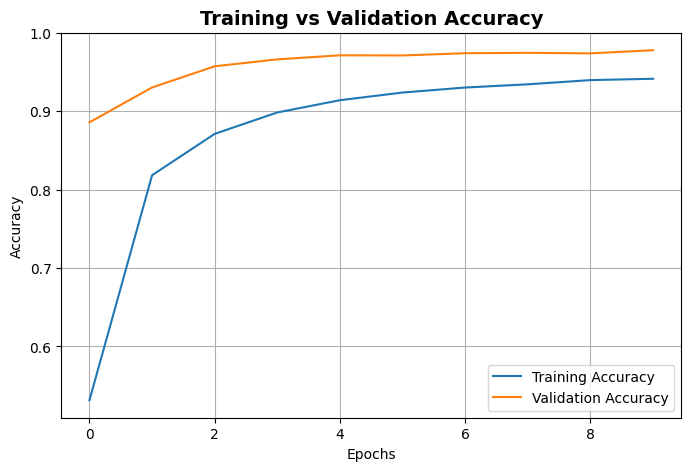

In [79]:
# Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Training & Validation Loss Curve

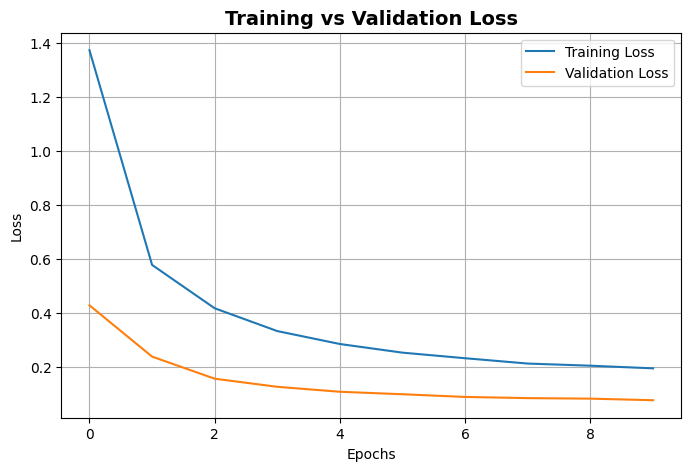

In [80]:
# Plot training vs validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


Final Accuracy & Loss

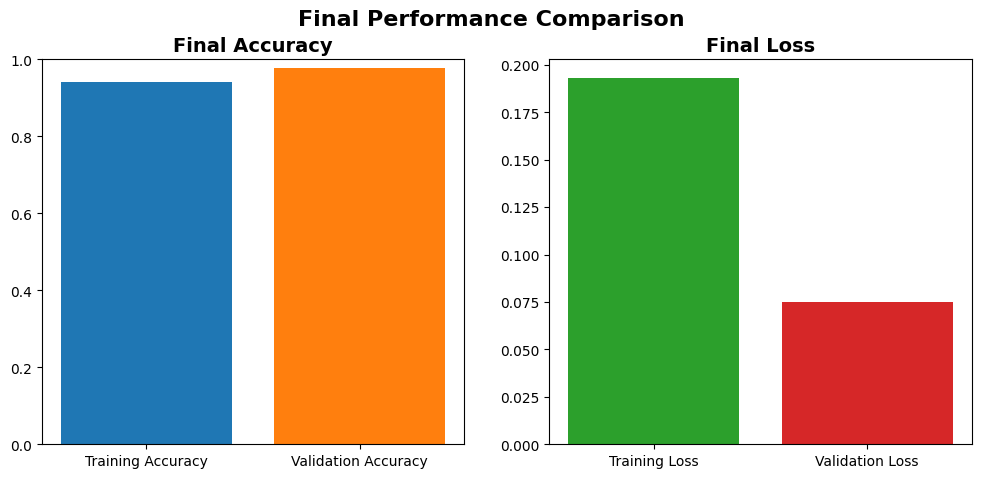

In [81]:
# Extract final accuracy and loss values
final_acc = [history.history['accuracy'][-1], history.history['val_accuracy'][-1]]
final_loss = [history.history['loss'][-1], history.history['val_loss'][-1]]

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Accuracy Bar Plot
ax[0].bar(['Training Accuracy', 'Validation Accuracy'], final_acc, color=['#1f77b4', '#ff7f0e'])
ax[0].set_title("Final Accuracy", fontsize=14, fontweight="bold")
ax[0].set_ylim(0, 1)
# Loss Bar Plot
ax[1].bar(['Training Loss', 'Validation Loss'], final_loss, color=['#2ca02c', '#d62728'])   
ax[1].set_title("Final Loss", fontsize=14, fontweight="bold")       
plt.suptitle("Final Performance Comparison", fontsize=16, fontweight="bold")
plt.show()          


Correctly Classified Samples

Total Correctly Classified Images: 9391


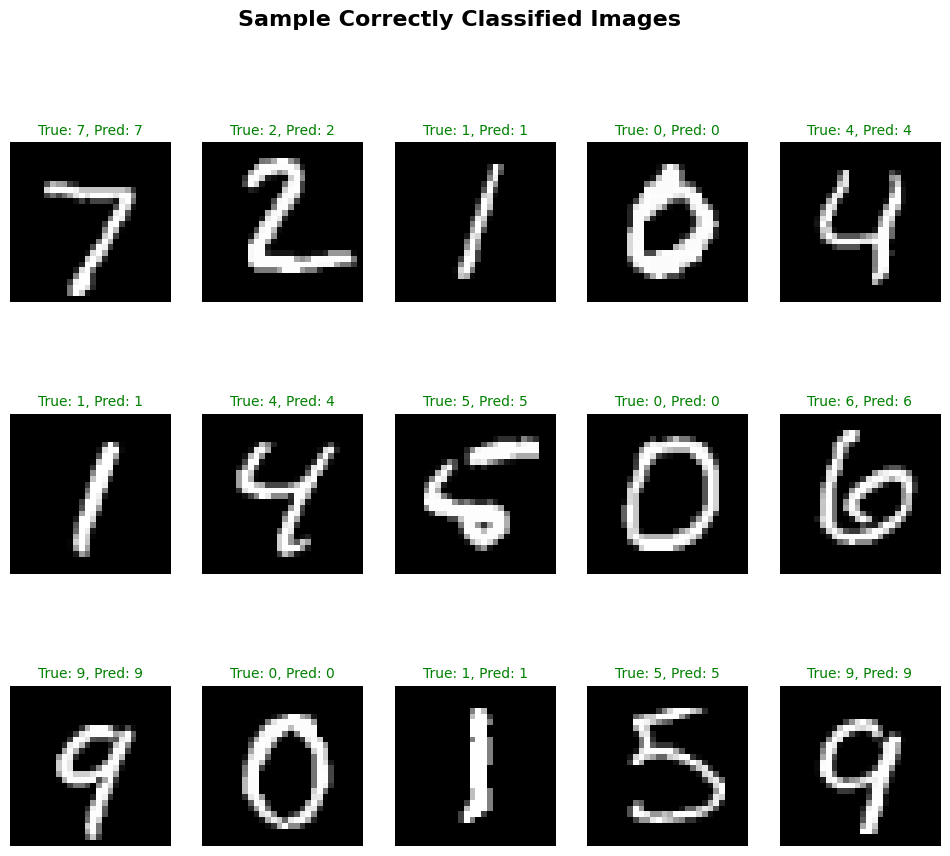

In [82]:
# Find correctly classified examples
correct_idx = np.where(y_pred == y_test)[0]

print(f"Total Correctly Classified Images: {len(correct_idx)}")

# Show first 15 correctly classified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(correct_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10, color='green')
    plt.axis('off')
plt.suptitle("Sample Correctly Classified Images", fontsize=16, fontweight="bold")
plt.show()

Display Misclassified Images

Total Misclassified Images: 609


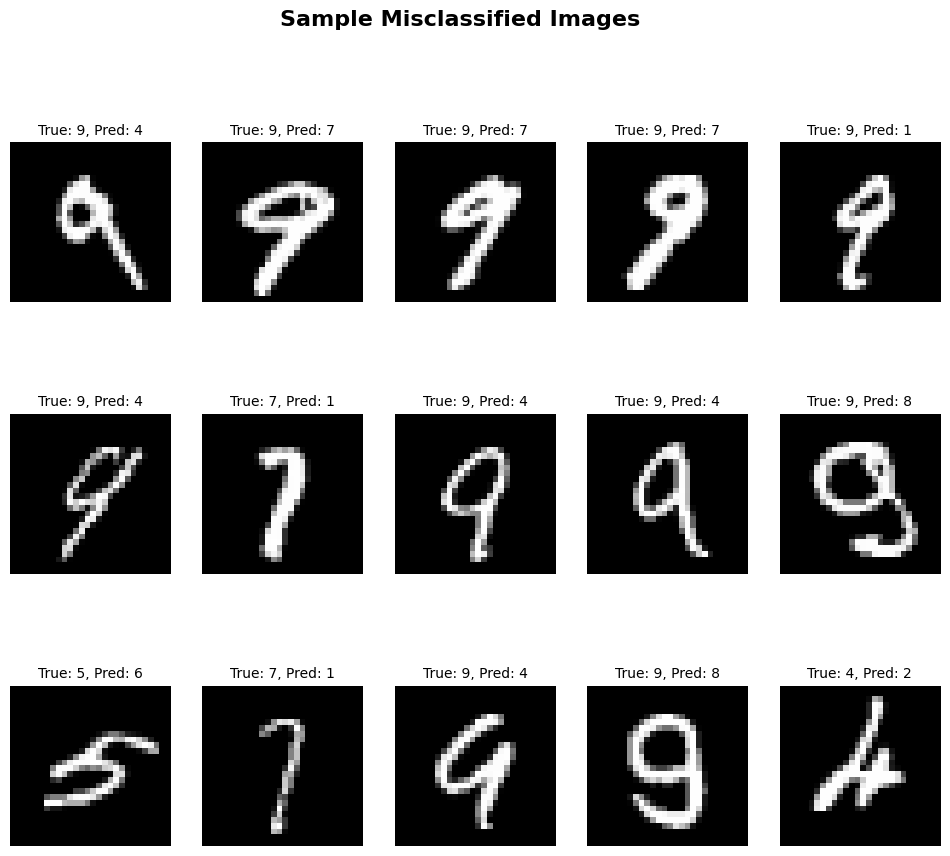

In [83]:
# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]

print(f"Total Misclassified Images: {len(misclassified_idx)}")

# Show first 15 misclassified images
plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified_idx[:15]):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=10)
    plt.axis('off')
plt.suptitle("Sample Misclassified Images", fontsize=16, fontweight="bold")
plt.show()

# 9.SAVE THE TRAINED MODEL

In [84]:
# Save the trained model
model.save("mnist_cnn_model.h5")

# Print confirmation
print("✅ Model has been saved successfully as 'mnist_cnn_model.h5'")

✅ Model has been saved successfully as 'mnist_cnn_model.h5'


# 10.FINAL INSIGHTS AND OBSERVATIONS

The CNN model trained successfully on the MNIST dataset and gave excellent results. It learned quickly and showed steady improvement in both training and validation accuracy. By the end of training, accuracy reached around 99%, which means the model understood the digit patterns very well.

✅ In short: The model performed amazingly well. It can recognize handwritten digits with near-perfect accuracy and is ready for real-world use.